In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Convolution

- operation from the field of signal processing

- a kernel matrix is slid over the input matrix, doing element-wise multiplication and summing

![SegmentLocal](img/convolution.gif)

In [2]:
def convolve2d(matrix, kernel, type='valid'):
    """
    isto kao cross_correlate, samo se kernel rotira 180
    """
    # Get the dimensions of the input matrix and kernel
    m, n = matrix.shape
    km, kn = kernel.shape

    if type == 'valid':
    
        # Calculate the dimensions of the output matrix
        output_dim_m = m - km + 1
        output_dim_n = n - kn + 1
        output = np.zeros((output_dim_m, output_dim_n))
        
        # Flip the kernel for convolution
        kernel_flipped = np.rot90(kernel, 2) # or kernel_flipped = np.flipud(np.fliplr(kernel))
        
        # Perform the convolution
        for i in range(output_dim_m):
            for j in range(output_dim_n):
                # Element-wise multiplication and summation
                region = matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel_flipped)
        
        return output
    
    elif type == 'full':

        output_dim_m = m + km - 1
        output_dim_n = n + kn - 1
        output = np.zeros((output_dim_m, output_dim_n))

        kernel_flipped = np.rot90(kernel, 2)

        padded_matrix = np.pad(matrix, ((km - 1, km - 1), (kn - 1, kn - 1)), mode='constant')

        for i in range(output_dim_m):
            for j in range(output_dim_n):
                region = padded_matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel_flipped)

        return output

def cross_correlate2d(matrix, kernel, type='valid'): 
    """
    OVO RADI

    dimenzija rezultata = dim_input - dim_kernel + 1
    Y = I - K + 1

    slidea kernel po regijama matrice velicine kernela, mnoze se elementi i zbrajaju

    valid - krece se u granicama matrice, od ruba do ruba, dimenzija je Y = I - K + 1

    full - izlazi van granica matrice, treba paddati matricu s nulama, Y = I + K - 1
    """
    # Get the dimensions of the input matrix and kernel
    m, n = matrix.shape
    km, kn = kernel.shape

    if type == 'valid':
        
        # Calculate the dimensions of the output matrix
        output_dim_m = m - km + 1
        output_dim_n = n - kn + 1
        output = np.zeros((output_dim_m, output_dim_n))
        
        # Perform the cross-correlation
        for i in range(output_dim_m):
            for j in range(output_dim_n):
                # Element-wise multiplication and summation
                region = matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel)
        
        return output
    
    elif type == 'full':
        
        # Calculate the dimensions of the output matrix
        output_dim_m = m + km - 1
        output_dim_n = n + kn - 1
        output = np.zeros((output_dim_m, output_dim_n))
        
        # Pad the input matrix with zeros
        padded_matrix = np.pad(matrix, ((km-1, km-1), (kn-1, kn-1)), mode='constant')

        # Perform the cross-correlation
        for i in range(output_dim_m):
            for j in range(output_dim_n):
                # Element-wise multiplication and summation
                region = padded_matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel)
        
        return output
    
def dilate(arr: np.ndarray, stride: int) -> np.ndarray:
    """
    Expands boundaries of an array by adding rows and columns of zeros between array elements.
    Number of rows and columns between two elements is stride - 1.

    Parameters
    ----------
    arr : np.ndarray
        Array to dilate.

    stride : int
        Number of zeroes added between a pair of elements.
        NOTE: stride - 1 zeros are added.

    Returns
    -------
    dilated_arr : np.ndarray
    """
    # Create a new array with appropriate size for dilation
    dilated_shape = (arr.shape[0] - 1) * stride + 1, (arr.shape[1] - 1) * stride + 1
    dilated = np.zeros(dilated_shape)
    
    # Place the original array elements into the dilated array
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            dilated[i * stride, j * stride] = arr[i, j]
    
    return dilated

def pad_to_shape(arr: np.ndarray, target_shape: tuple) -> np.ndarray:
    """
    Adds padding to array so it matches target shape.

    Parameters
    ----------
    arr : np.ndarray
        Array to pad.

    target_shape : tuple
        Shape of the array after padding.

    Returns
    -------
    padded_arr : np.ndarray
    """
    # Calculate padding needed
    pad_height = target_shape[0] - arr.shape[0]
    pad_width = target_shape[1] - arr.shape[1]
    
    if pad_height < 0 or pad_width < 0:
        raise ValueError("Target shape must be larger than the array shape.")
    
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left
    
    # Apply padding
    padded = np.pad(arr, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=0)
    return padded

# Cross Correlate

In [3]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = cross_correlate2d(a, kernel)
print(c)

c = signal.correlate2d(a, kernel, mode='valid')
print(c)

[[8. 7.]
 [4. 5.]]
[[8 7]
 [4 5]]


# Cross Correlate full

In [4]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = cross_correlate2d(a, kernel, type='full')
print(c)

c = signal.correlate2d(a, kernel)
print(c)

[[ 0. -1. -6. -2.]
 [ 2.  8.  7.  1.]
 [10.  4.  5. -3.]
 [14.  7.  8.  4.]]
[[ 0 -1 -6 -2]
 [ 2  8  7  1]
 [10  4  5 -3]
 [14  7  8  4]]


# Convolve

In [5]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = convolve2d(a, kernel)
print(c)

c = signal.convolve2d(a, kernel, mode='valid')
print(c)

[[ 7.  5.]
 [11.  3.]]
[[ 7  5]
 [11  3]]


# Convolve full

In [6]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = convolve2d(a, kernel, type='full')
print(c)

c = signal.convolve2d(a, kernel)
print(c)

[[ 1.  8. 14.  4.]
 [ 4.  7.  5.  2.]
 [ 2. 11.  3.  8.]
 [-7.  0. -4.  0.]]
[[ 1  8 14  4]
 [ 4  7  5  2]
 [ 2 11  3  8]
 [-7  0 -4  0]]


# Convolutional layer

In [7]:
from math import floor
from dlfs.base import Layer

class ConvolutionalLayer(Layer):

    def __init__(self, input_shape: tuple, output_channels: int, kernel_size: int, stride: int = 1) -> None:
        """
        Convolutional layer.

        Parameters
        ----------
        input_shape : tuple
            Dimension of a single sample processed by the layer. For images it's (channels, height, width).

        output_channels : int
            Depth of the output array.

        kernel_size : int
            Dimension of a single kernel, a square array of shape (kernel_size, kernel_size).

        stride : int, default=1
            Step size at which the kernel moves across the input.
        """
        # Unpack the input_shape tuple
        input_channels, input_height, input_width = input_shape

        self.input_channels = input_channels
        self.output_channels = output_channels
        self.kernel_size = kernel_size
        self.stride = stride

        # Calculate output height and width
        output_height = int(floor((input_height - kernel_size) / stride) + 1) 
        output_width = int(floor((input_width - kernel_size) / stride) + 1)

        # Create output and kernel shapes
        self.output_shape = (output_channels, output_height, output_width)
        self.kernels_shape = (output_channels, input_channels, kernel_size, kernel_size)

        # Initialize layer parameters
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the convolutional layer. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Number of samples, first dimension
        n_samples = inputs.shape[0]

        # Store inputs for later use
        self.inputs = inputs

        # Output is 4D tensor of shape (n_samples, output_channels, height, width)
        self.output = np.zeros((n_samples, *self.output_shape))

        # Add bias to output
        self.output += self.biases

        # Loop through each sample, output channel and input channel
        for i in range(n_samples):
            for j in range(self.output_channels):
                for k in range(self.input_channels):
                    # Output is the cross correlation in valid mode between the input and kernel
                    self.output[i, j] += signal.correlate2d(self.inputs[i, k], self.kernels[j, k], mode="valid")[::self.stride, ::self.stride]
            
    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the convolutional layer. Creates gradient attributes with respect to kernels, biases and inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Initialize gradient attributes
        self.dkernels = np.zeros(self.kernels.shape)
        self.dbiases = np.zeros(self.biases.shape)
        self.dinputs = np.zeros(self.inputs.shape)

        # Number of samples, first dimension
        n_samples = self.inputs.shape[0]

        # Loop through each sample, output channel and input channel
        for i in range(n_samples):

            # Gradient with respect to biases is the sum of deltas
            self.dbiases += delta[i]

            for j in range(self.output_channels):
                for k in range(self.input_channels):

                    if self.stride == 1:
                        # Gradient with respect to kernels is the valid correlaton between input and delta
                        self.dkernels[j, k] += signal.correlate2d(self.inputs[i, k], delta[i, j], "valid")
                        # Gradient with respect to inputs is the full convolution between delta and kernel
                        self.dinputs[i, k] += signal.convolve2d(delta[i, j], self.kernels[j, k], "full")

                    # If stride is bigger than 1, dilation of delta is required
                    else:

                        delta_dilated = dilate(delta[i, j], stride=self.stride)

                        delta_dilated_shape = delta_dilated.shape
                        input_shape = self.inputs[i, k].shape[0]
                        kernel_shape = self.dkernels[j, k].shape[0]

                        if delta_dilated_shape == input_shape - kernel_shape + 1:
                            # If dilated delta shape matches the needed correlation shape gradient is computed
                            dkernel = signal.correlate2d(self.inputs[i, k], delta_dilated, "valid")
                        else:
                            # If dilated delta shape doesn't match the needed correlation shape padding is needed
                            new_delta_shape = (input_shape - kernel_shape + 1, input_shape - kernel_shape + 1)
                            delta_dilated_padded = pad_to_shape(delta_dilated, new_delta_shape)
                            dkernel = signal.correlate2d(self.inputs[i, k], delta_dilated_padded, "valid")
                            
                        self.dkernels[j, k] += dkernel

                        # Full convolution between dilated delta and kernel similar to stride=1
                        dinput = signal.convolve2d(delta_dilated, self.kernels[j, k], "full")

                        if dinput.shape == self.dinputs[i, k].shape:
                            # If the shape of convolution result is equal to input gradient shape they can be summed
                            self.dinputs[i, k] += dinput
                        else:
                            # If the shapes are not equal, padding of result is needed to match the input gradient shape
                            dinput_padded = pad_to_shape(dinput, self.dinputs[i, k].shape)
                            self.dinputs[i, k] += dinput_padded

# Reshape layer

In [8]:
class ReshapeLayer(Layer):

    def __init__(self, input_shape, output_shape) -> None:
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, inputs):
        # converts [batch_size, depth, height, width] to [batch_size, depth * height * width]
        batch_size = inputs.shape[0]
        self.output = np.reshape(inputs, (batch_size, self.output_shape))

    def backward(self, delta):
        # converts [batch_size, depth * height * width] to [batch_size, depth, height, width]
        batch_size = delta.shape[0]
        self.dinputs = np.reshape(delta, (batch_size, *self.input_shape))

# Binary MNIST classification

In [9]:
from keras.datasets import mnist
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    return x, y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

In [10]:
from dlfs.layers import DenseLayer
from dlfs.activation import Sigmoid
from dlfs.loss import BCE_Loss
from dlfs.optimizers import Optimizer_SGD
from dlfs import Model

# output = floor( (input - kernel) / stride ) + 1
layers = [ConvolutionalLayer(input_shape=(1, 28, 28), output_channels=5, kernel_size=3),
          Sigmoid(),
          ConvolutionalLayer(input_shape=(5, 26, 26), output_channels=8, kernel_size=4, stride=2),
          ReshapeLayer(input_shape=(8, 12, 12), output_shape=8*12*12),
          DenseLayer(8*12*12, 100),
          Sigmoid(),
          DenseLayer(100, 1),
          Sigmoid()]

model = Model(layers=layers, loss_function=BCE_Loss(), optimizer=Optimizer_SGD(5e-4))

model.train(x_train, y_train.reshape(-1, 1), print_every=20, epochs=100)

===== EPOCH : 0 ===== LOSS : 0.6740765563038471 =====
===== EPOCH : 20 ===== LOSS : 0.4920325467826159 =====
===== EPOCH : 40 ===== LOSS : 0.08252406995591098 =====
===== EPOCH : 60 ===== LOSS : 0.04781801159667813 =====
===== EPOCH : 80 ===== LOSS : 0.03285776239104376 =====
===== EPOCH : 100 ===== LOSS : 0.02467342863099139 =====


In [11]:
y_pred = model.predict(x_test)
print(f'Model accuracy: {np.mean(np.round(y_pred) == y_test.reshape(-1, 1))}')

Model accuracy: 1.0


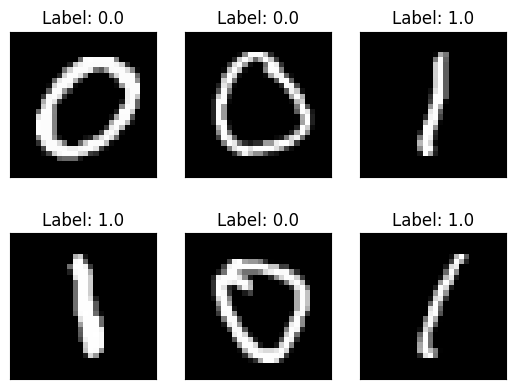

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3)
i, j = 0, 0

np.random.shuffle(x_test)

for idx, x in enumerate(x_test[:6]):

    img = x.reshape(28, 28)
    x = x.reshape(1, *x.shape)
    y_pred = model.predict(x)

    ax[i, j].imshow(img, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_title(f'Label: {np.round(y_pred[0, 0])}')

    j += 1
    if j % 3 == 0:
        i += 1
        j = 0

plt.show()

# Visualization of kernels learned

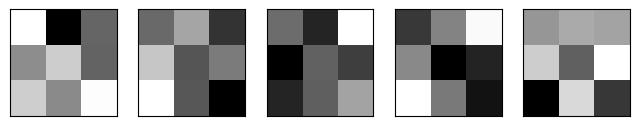

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(8, 8))

conv = model.layers[0]

for i in range(conv.output_channels):
    for j in range(conv.input_channels):

        x = conv.kernels[i, j]
        ax[i].imshow(x, cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])

plt.show()

# MNIST classification

In [39]:
def preprocess_whole_mnist(x):
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    return x

def one_hot_encode(y):
    categories = np.unique(y)
    encoded_y = np.zeros((len(y), len(categories)))

    for idx, label in enumerate(y):
        to_encode_idx = np.argwhere(categories == label)
        encoded_y[idx, to_encode_idx] = 1

    return encoded_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_whole_mnist(x_train[:1000])
x_test = preprocess_whole_mnist(x_test[:500])

y_train = one_hot_encode(y_train[:1000])
y_test = one_hot_encode(y_test[:500])

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 1, 28, 28)
(500, 1, 28, 28)
(1000, 10)
(500, 10)


In [40]:
from dlfs.base import Loss, Activation

class CCE_Loss(Loss):

    def calculate(self, y_pred, y_true):
        samples = range(len(y_pred))
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[samples, y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        return (-np.sum(np.log(correct_confidences)))

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if(len(y_true.shape)) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples   

class Softmax(Activation):

    def forward(self, inputs):
        self.inputs = inputs
        exp = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp / np.sum(exp, axis=1, keepdims=True) 

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues) 

        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):

            single_output = single_output.reshape(-1, 1)

            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues) 

In [41]:
layers = [ConvolutionalLayer(input_shape=(1, 28, 28), output_channels=5, kernel_size=3),
          Sigmoid(),
          ConvolutionalLayer(input_shape=(5, 26, 26), output_channels=8, kernel_size=4, stride=2),
          ReshapeLayer(input_shape=(8, 12, 12), output_shape=8*12*12),
          DenseLayer(8*12*12, 100),
          Sigmoid(),
          DenseLayer(100, 10),
          Softmax()]

model = Model(layers=layers, loss_function=CCE_Loss(), optimizer=Optimizer_SGD(learning_rate=5e-2))

model.train(x_train, y_train, print_every=10, epochs=150)

===== EPOCH : 0 ===== LOSS : 2457.9189665015124 =====
===== EPOCH : 10 ===== LOSS : 2204.4628855131496 =====
===== EPOCH : 20 ===== LOSS : 2152.9036795378497 =====


KeyboardInterrupt: 

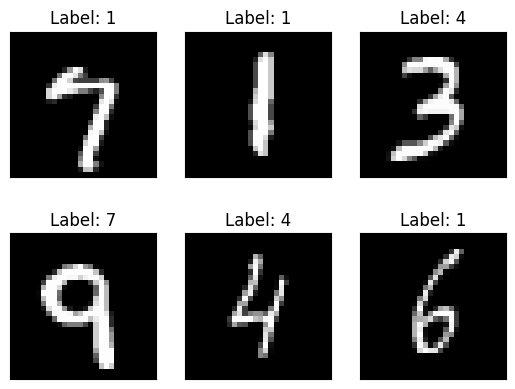

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3)
i, j = 0, 0

np.random.shuffle(x_test)

for idx, x in enumerate(x_test[:6]):

    img = x.reshape(28, 28)
    x = x.reshape(1, *x.shape)
    y_pred = model.predict(x)

    ax[i, j].imshow(img, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_title(f'Label: {np.argmax(y_pred[0])}')

    j += 1
    if j % 3 == 0:
        i += 1
        j = 0

plt.show()